1. LOADING THE DATASET

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
data = od.download("https://www.kaggle.com/datasets/grassknoted/asl-alphabet")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: selfstudyzoneindia
Your Kaggle Key: ··········


100%|██████████| 1.03G/1.03G [00:11<00:00, 99.4MB/s]


2. DATA PRE-PROCESSING

A. Importing necessary libraries

In [4]:
!pip install imutils

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import gc
import string
import time
import random
import imutils
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

B. Null Value Handling

1. Downloading any sample file from "asl_alphabet_train/del" folder of the training data.

2. Renaming that file as "del_test.jpg"

3. Uploading the file, "del_test.jpg" in the "asl_alphabet_test" folder of the testing data.

C. Labelling the dataset

In [9]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [10]:
classes = 0
for i in labels:
  classes+=1
print("The number of classes are: ", classes)

The number of classes are:  29


In [11]:
train='/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
list_path = []
list_labels = []
for label in labels:
    label_path = os.path.join(train, label, "*")
    image_files = glob.glob(label_path)

    sign_label = [label] * len(image_files)

    list_path.extend(image_files)
    list_labels.extend(sign_label)
metadata = pd.DataFrame({"image_path": list_path, "label": list_labels})
metadata

,image_path,label
0,/content/asl-alphabet/asl_alphabet_train/asl_a...,A
1,/content/asl-alphabet/asl_alphabet_train/asl_a...,A
2,/content/asl-alphabet/asl_alphabet_train/asl_a...,A
3,/content/asl-alphabet/asl_alphabet_train/asl_a...,A
4,/content/asl-alphabet/asl_alphabet_train/asl_a...,A
...,...,...
86995,/content/asl-alphabet/asl_alphabet_train/asl_a...,space
86996,/content/asl-alphabet/asl_alphabet_train/asl_a...,space
86997,/content/asl-alphabet/asl_alphabet_train/asl_a...,space
86998,/content/asl-alphabet/asl_alphabet_train/asl_a...,space


D. Defining a seeding function

In [12]:
def seedingFunction(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

3. SPLITTING INTO TRAINING AND TESTING DATA

In [13]:
#Testing data
X_train, X_test, Y_train, Y_test = train_test_split(metadata["image_path"], metadata["label"],
                                                    test_size=0.15,
                                                    random_state=2500,
                                                    shuffle=True,
                                                    stratify=metadata["label"]
                                                   )
data_train = pd.DataFrame({"image_path": X_train,
                           "label": Y_train
                          })

#Validation data
X_train, X_val, Y_train, Y_val = train_test_split(data_train["image_path"], data_train["label"],
                                                  test_size=0.15/0.70,
                                                  random_state=2500,
                                                  shuffle=True,
                                                  stratify=data_train["label"]
                                                  )
data_train = pd.DataFrame({"image_path": X_train,
                           "label": Y_train
                          })
data_val = pd.DataFrame({"image_path": X_val,
                         "label": Y_val
                        })
data_test = pd.DataFrame({"image_path": X_test,
                          "label": Y_test
                         })

In [14]:
#TRAINING DATA
display(data_train)

,image_path,label
77341,/content/asl-alphabet/asl_alphabet_train/asl_a...,Z
20676,/content/asl-alphabet/asl_alphabet_train/asl_a...,G
45224,/content/asl-alphabet/asl_alphabet_train/asl_a...,P
74828,/content/asl-alphabet/asl_alphabet_train/asl_a...,Y
64548,/content/asl-alphabet/asl_alphabet_train/asl_a...,V
...,...,...
24339,/content/asl-alphabet/asl_alphabet_train/asl_a...,I
46578,/content/asl-alphabet/asl_alphabet_train/asl_a...,P
7778,/content/asl-alphabet/asl_alphabet_train/asl_a...,C
12043,/content/asl-alphabet/asl_alphabet_train/asl_a...,E


In [15]:
len(data_train)

58103

In [16]:
#TESTING DATA
display(data_test)

,image_path,label
13070,/content/asl-alphabet/asl_alphabet_train/asl_a...,E
15720,/content/asl-alphabet/asl_alphabet_train/asl_a...,F
4831,/content/asl-alphabet/asl_alphabet_train/asl_a...,B
30719,/content/asl-alphabet/asl_alphabet_train/asl_a...,K
41447,/content/asl-alphabet/asl_alphabet_train/asl_a...,N
...,...,...
7203,/content/asl-alphabet/asl_alphabet_train/asl_a...,C
55199,/content/asl-alphabet/asl_alphabet_train/asl_a...,S
61318,/content/asl-alphabet/asl_alphabet_train/asl_a...,U
11535,/content/asl-alphabet/asl_alphabet_train/asl_a...,D


In [17]:
len(data_test)

13050

In [18]:
#VALIDATION DATASET
display(data_val)

,image_path,label
28592,/content/asl-alphabet/asl_alphabet_train/asl_a...,J
75456,/content/asl-alphabet/asl_alphabet_train/asl_a...,Z
28523,/content/asl-alphabet/asl_alphabet_train/asl_a...,J
86334,/content/asl-alphabet/asl_alphabet_train/asl_a...,space
52861,/content/asl-alphabet/asl_alphabet_train/asl_a...,R
...,...,...
31155,/content/asl-alphabet/asl_alphabet_train/asl_a...,K
75768,/content/asl-alphabet/asl_alphabet_train/asl_a...,Z
70817,/content/asl-alphabet/asl_alphabet_train/asl_a...,X
7021,/content/asl-alphabet/asl_alphabet_train/asl_a...,C


In [19]:
len(data_val)

15847

Data Augmentation

In [20]:
def data_augmentation():
    datagenerator = ImageDataGenerator(rescale=1/255.,
                                      rotation_range=20,
                                      zoom_range=0.2,
                                      horizontal_flip=True)
    #Augmenting Training Images:
    train_dataGen = datagenerator.flow_from_dataframe(data_train,
                                                      directory="./",
                                                      x_col="image_path",
                                                      y_col="label",
                                                      class_mode="categorical",
                                                      batch_size=64,
                                                      target_size=(64, 64),
                                                      )

    #Augmenting Testing Images:
    test_dataGen = datagenerator.flow_from_dataframe(data_test,
                                                     directory="./",
                                                     x_col="image_path",
                                                     y_col="label",
                                                     class_mode="categorical",
                                                     batch_size=1,
                                                     target_size=(64, 64),
                                                     shuffle=False
                                                     )

    #Augmenting Validation Images:
    validation_dataGen = datagenerator.flow_from_dataframe(data_val,
                                                           directory="./",
                                                           x_col="image_path",
                                                           y_col="label",
                                                           class_mode="categorical",
                                                           batch_size=64,
                                                           target_size=(64, 64),
                                                           )
    return train_dataGen, test_dataGen, validation_dataGen

In [21]:
seedingFunction(2500)
train_dataGen, validation_dataGen, test_dataGen = data_augmentation()

Found 58103 validated image filenames belonging to 29 classes.
Found 13050 validated image filenames belonging to 29 classes.
Found 15847 validated image filenames belonging to 29 classes.


4. MODEL BUILDING

USING VGG-16

In [22]:
# Load the VGG16 base model
model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze all layers in the base model
for layer in model_vgg.layers:
    layer.trainable = False

# Create your custom model
x = model_vgg.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(29, activation='softmax')(x)

model = Model(inputs=model_vgg.input, outputs=predictions)

# Display the model summary
display(model.summary())


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

None

MODEL COMPILING

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('asl_vgg16_best_weights.h5', save_best_only=True, monitor='val_accuracy', mode='max')

MODEL TRAINING

In [24]:
history = model.fit(train_dataGen,
                    steps_per_epoch=train_dataGen.samples // 64,
                    epochs=15,
                    validation_data=validation_dataGen,
                    validation_steps=validation_dataGen.samples // 64,
                    callbacks=[checkpoint]
                    )

Epoch 1/15
907/907 [==============================] - 134s 141ms/step - loss: 1.9712 - accuracy: 0.3929 - val_loss: 1.1563 - val_accuracy: 0.6749
Epoch 2/15
907/907 [==============================] - 124s 136ms/step - loss: 1.2918 - accuracy: 0.5810 - val_loss: 0.8059 - val_accuracy: 0.7241
Epoch 3/15
907/907 [==============================] - 123s 136ms/step - loss: 1.1231 - accuracy: 0.6332 - val_loss: 0.6289 - val_accuracy: 0.8473
Epoch 4/15
907/907 [==============================] - 123s 136ms/step - loss: 1.0251 - accuracy: 0.6619 - val_loss: 0.7031 - val_accuracy: 0.7931
Epoch 5/15
907/907 [==============================] - 123s 135ms/step - loss: 0.9639 - accuracy: 0.6820 - val_loss: 0.5093 - val_accuracy: 0.8768
Epoch 6/15
907/907 [==============================] - 123s 135ms/step - loss: 0.9211 - accuracy: 0.6983 - val_loss: 0.5540 - val_accuracy: 0.8325
Epoch 7/15
907/907 [==============================] - 122s 134ms/step - loss: 0.8792 - accuracy: 0.7099 - val_loss: 0.5208 -

5. MODEL EVALUATION

In [25]:
scores = model.evaluate(test_dataGen)
print("%s: %.2f%%" % ("Evaluate Test Accuracy", scores[1]*100))

248/248 [==============================] - 34s 137ms/step - loss: 0.4429 - accuracy: 0.8686
Evaluate Test Accuracy: 86.86%


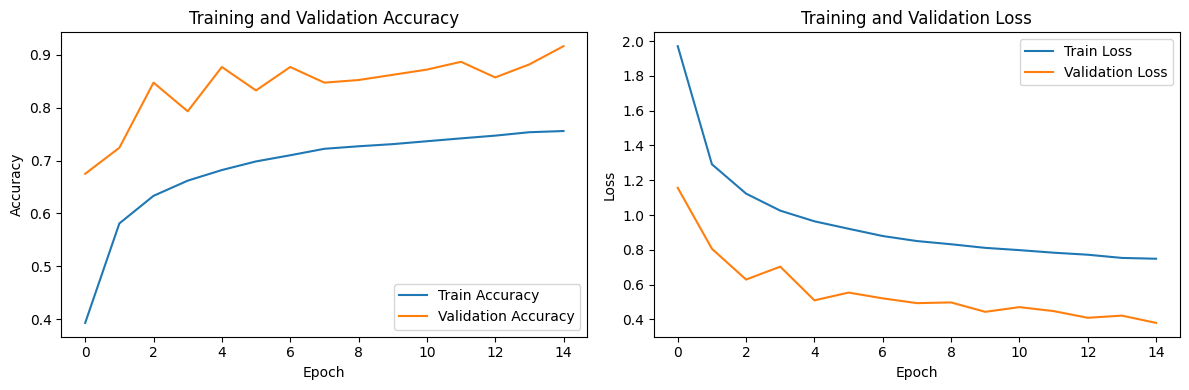

In [26]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

6. SAVING THE MODEL

In [27]:
fine_tuned_model = load_model("/content/asl_vgg16_best_weights.h5")
fine_tuned_model.save("asl_model.h5")